<a href="https://colab.research.google.com/github/Anurag17singh/Machine-Learning-Algorithms/blob/main/Wonder_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [6]:
import zipfile; zipfile.ZipFile('/content/drive/MyDrive/Wonders_of_World.zip', 'r').extractall('sample_data')


In [7]:
# Step 2: Data Preprocessing
image_size = (224, 224)
batch_size = 32

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # Splitting the dataset into training and validation sets
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/Wonders of World',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', # Specify the subset as training
)

Found 3082 images belonging to 12 classes.


In [21]:
# Get the class indices from the train_generator
class_indices = train_generator.class_indices

# Get the class names from the class indices
class_names = list(class_indices.keys())

# Print the class names
print(class_names)


['burj_khalifa', 'chichen_itza', 'christ_the_reedemer', 'eiffel_tower', 'great_wall_of_china', 'machu_pichu', 'pyramids_of_giza', 'roman_colosseum', 'statue_of_liberty', 'stonehenge', 'taj_mahal', 'venezuela_angel_falls']


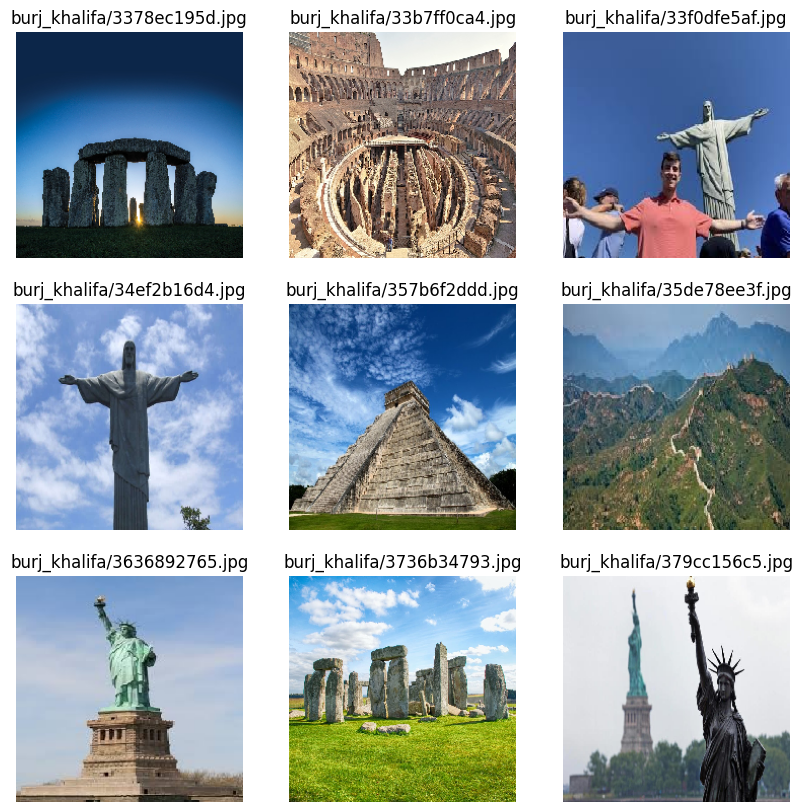

In [15]:
# Get a batch of images from the training generator
batch = train_generator.next()

# Display a few sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0][i])
    plt.title(train_generator.filenames[i])
    plt.axis('off')
plt.show()


In [16]:
validation_generator = train_datagen.flow_from_directory(
    '/content/sample_data/Wonders of World',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', # Specify the subset as validation
)

Found 764 images belonging to 12 classes.


In [17]:
# Step 3: Model Creation
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(12, activation='softmax') # Assuming 12 categories
])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# Step 4: Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10, # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
96/96 [==============================] - 370s 4s/step - loss: 1.7485 - accuracy: 0.4321 - val_loss: 1.4812 - val_accuracy: 0.5109
Epoch 2/10
96/96 [==============================] - 377s 4s/step - loss: 1.2589 - accuracy: 0.5941 - val_loss: 1.2073 - val_accuracy: 0.6223
Epoch 3/10
96/96 [==============================] - 359s 4s/step - loss: 0.9105 - accuracy: 0.7062 - val_loss: 1.0249 - val_accuracy: 0.6753
Epoch 4/10
96/96 [==============================] - 353s 4s/step - loss: 0.5462 - accuracy: 0.8298 - val_loss: 1.0238 - val_accuracy: 0.7052
Epoch 5/10
96/96 [==============================] - 367s 4s/step - loss: 0.3142 - accuracy: 0.8931 - val_loss: 0.8824 - val_accuracy: 0.7785
Epoch 6/10
96/96 [==============================] - 368s 4s/step - loss: 0.1807 - accuracy: 0.9449 - val_loss: 0.8967 - val_accuracy: 0.8003
Epoch 7/10
96/96 [==============================] - 369s 4s/step - loss: 0.0989 - accuracy: 0.9718 - val_loss: 0.8838 - val_accuracy: 0.8179
Epoch 8/10
96

In [24]:
# Step 5: Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

24/24 [==============================] - 26s 1s/step - loss: 1.0200 - accuracy: 0.8390
Validation accuracy: 0.8390052318572998


1/1 [==============================] - 1s 1s/step


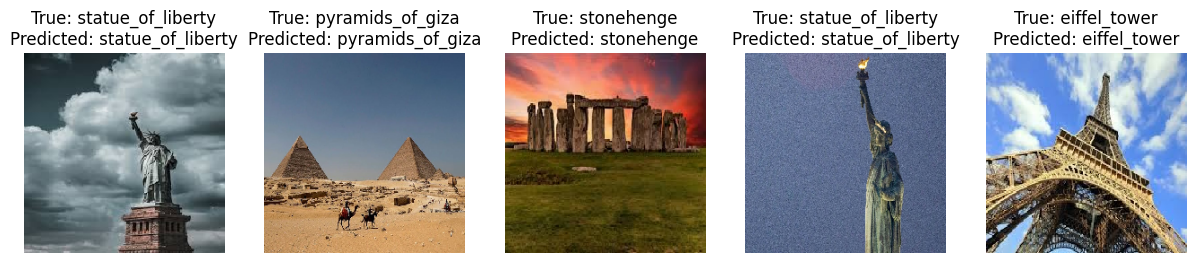

In [35]:
import numpy as np

# Get a batch of images and true labels from the validation generator
images, true_labels = validation_generator.next()

# Make predictions using the model
predictions = model.predict(images)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get class names from the generator
class_names = list(validation_generator.class_indices.keys())

# Display the images along with their true and predicted labels
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[np.argmax(true_labels[i])]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')
plt.show()
